<a href="https://colab.research.google.com/github/Whitchurch/Tensorflow/blob/main/NumberRecognition_WithCNN_998_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.6.0


Point to the mnist numbers database

In [3]:
mnist = keras.datasets.mnist

Load the data from the MNIST_numbers dataset

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


View sample data: You can see the object in the picture as a matrix of numbers. Pretty cool huh!.  Just like the move: The Matrix.

(60000, 28, 28)

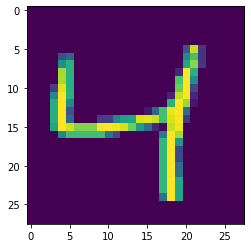

In [21]:
np.set_printoptions(linewidth=200)
picIndex = tf.Variable(2)
plt.imshow(training_images[picIndex])

#Check the shape of the array
training_images.shape
#training_images[picIndex].shape
#print(training_labels[picIndex])
#print(training_images[picIndex])

Normalize the input values. So that input weights don't dominate due to being on a higher scale.  We just divide, to do the scaling. Better approach is to do Z-normalization. Centering around the zero mean.

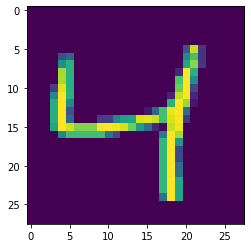

In [8]:
training_images = training_images/255
test_images = test_images/255
plt.imshow(training_images[picIndex])


We need to reshape the input images and test images to feed into the convolution layers, to satisfy tensorflow's needs:  

The code below gets the job done:

In [26]:
#We package the data into a single tensor, basically everything is wrapped up into a tensor to be sent to the first convolutional layer of
#the neural network.
training_images_conv=training_images.reshape(60000, 28, 28, 1)
test_images_conv = test_images.reshape(10000, 28, 28, 1)

training_images_conv.shape
training_images_conv[picIndex].shape

(28, 28, 1)

Now build the CNN

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.998): # Experiment with changing this value
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True


mycallbacks = myCallback()



#This is the beginning part of the Neural Network where we introduce the convolutions:
#The requirements are to use a single level of (Convolution+Maxpooling) to achieve 99% accuracy.
model = tf.keras.models.Sequential([  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                    #This is the fully connected dense layer part of the Neural Network  
                                      tf.keras.layers.Flatten(), 
                                      tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images_conv, training_labels, epochs=10, callbacks=[mycallbacks])
model.summary()

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1343 - accuracy: 0.9595
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0450 - accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0257 - accuracy: 0.9921
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 5/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0114 - accuracy: 0.9964
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0094 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0063 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0052 - accuracy: 0.9985

Reached 99% accuracy so cancelling training!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Outpu

Try out some test data:

In [30]:
test_loss = model.evaluate(test_images_conv, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0475 - accuracy: 0.9880
